# GLLB-SC functional Calculation 
## Determination of Fundamental Band Gap along with Bandstructure

In [6]:
import matplotlib.pyplot as plt
# change defaults to make plots bigger
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 # 200 dpi is really fine, but slower (i.e. for publication)

In [7]:
from ase.spacegroup import crystal
from ase.visualize import view
from ase.io import read
from ase.build import bulk
from ase.optimize import BFGS
from ase.optimize import BFGSLineSearch
from gpaw import GPAW, PW, FermiDirac
import matplotlib.pyplot as plt
from ase.dft.dos import DOS
from ase.constraints import UnitCellFilter
from ase.build import mx2
from gpaw import *
from ase.constraints import StrainFilter
from gpaw.xc.vdw import VDWFunctional

atoms=read('MoSWS.traj')
calc = GPAW(mode=PW(600),
            xc='GLLBSC',
            nbands=70,
            convergence={'bands': -20},
            setups={'Mo, W': '6'},      
            parallel={'band': 1, 'domain': 1},
            occupations=FermiDirac(width=0.01),
            kpts={'size': (42, 42, 1), 'gamma': True})  
atoms.calc = calc
atoms.get_potential_energy()
calc.write('gs_gllbsc.gpw', mode='all')

#atoms, calc=restart('gs_gllbsc.gpw')

In [8]:
# OK, sanity checks on that calculation!
# What is the band-gap, and does it look sensible?
from ase.dft.bandgap import bandgap
gap, p1, p2 = bandgap(atoms.calc)
# Output is the gap in eV
# and from where the VBM in k-space is, and where the CBM is.
# From here you can appreciate whether the material is direct or not.

Gap: 1.350 eV
Transition (v -> c):
  (s=0, k=0, n=25, [-0.00, -0.00, 0.00]) -> (s=0, k=602, n=26, [0.33, 0.33, 0.00])


MCLC(a=3.18522, b=5.51751, c=14.5326, alpha=89.9892)
  Variant name: MCLC1
  Special point names: GNN1FF1F2F3II1LMXX1X2YY1Z
  Default path: GYFLI,I1ZF1,YX1,XGN,MG

  Special point coordinates:
    G   0.0000  0.0000  0.0000
    N   0.5000  0.0000  0.0000
    N1  0.0000 -0.5000  0.0000
    F   0.5000  0.5000  0.4995
    F1  0.5000  0.5000  0.5005
    F2 -0.5000 -0.5000  0.4995
    F3  0.5000 -0.5000  0.4995
    I   0.6667  0.3333  0.5000
    I1  0.3333 -0.3333  0.5000
    L   0.5000  0.5000  0.5000
    M   0.5000  0.0000  0.5000
    X   0.3333 -0.3333  0.0000
    X1  0.6667  0.3333  0.0000
    X2 -0.3333 -0.6667  0.0000
    Y   0.5000  0.5000  0.0000
    Y1 -0.5000 -0.5000  0.0000
    Z   0.0000  0.0000  0.5000



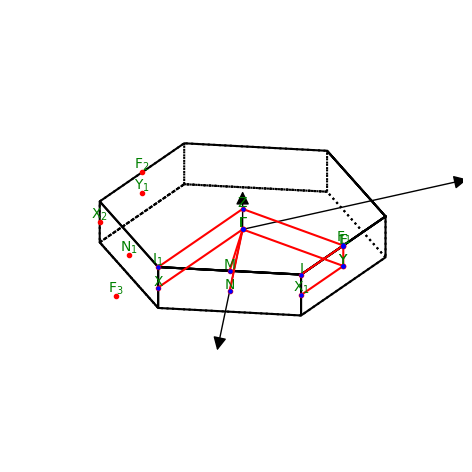

<Axes3DSubplot:>

In [9]:
# OK! Luckily ASE knows all about space groups and the reciprocal lattice.
# So let's ask it what it knows about this one, and a suggested high-symmetry path.
lat = atoms.cell.get_bravais_lattice()
print(lat.description())
lat.plot_bz(show=True)


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  22.8.0
 |___|_|             

User:   tewodros@tewodros-HP-Pavilion-Laptop-14-bf0xx
Date:   Sun May 11 18:06:23 2025
Arch:   x86_64
Pid:    26387
CWD:    /home/tewodros/Desktop/Hetrostructure/HTR/revised/HTR/1T_2H/MoS2-WS2
Python: 3.7.12
gpaw:   /home/tewodros/miniconda3/lib/python3.7/site-packages/gpaw
_gpaw:  /home/tewodros/miniconda3/lib/python3.7/site-packages/
        _gpaw.cpython-37m-x86_64-linux-gnu.so
ase:    /home/tewodros/miniconda3/lib/python3.7/site-packages/ase (version 3.22.1)
numpy:  /home/tewodros/miniconda3/lib/python3.7/site-packages/numpy (version 1.21.6)
scipy:  /home/tewodros/miniconda3/lib/python3.7/site-packages/scipy (version 1.7.3)
libxc:  5.2.3
units:  Angstrom and eV
cores: 1
OpenMP: True
OMP_NUM_THREADS: 1

Input parameters:
  convergence: {bands: -20,
                density: 0.0001,
                eigenstates: 4e-08,
                energy: 0.0005}
  gpts: [18 18 84]

     iter     time        total  log10-change:
                         energy  eigst   dens
iter:   1 18:08:27   -49.154250  +2.12       c
iter:   2 18:09:30   -49.194214  +0.61       c
iter:   3 18:10:32   -49.195478  -0.45       c
iter:   4 18:11:42   -49.195563c -1.44       c
iter:   5 18:12:50   -49.195570c -2.42       c
iter:   6 18:13:53   -49.195571c -3.45       c
iter:   7 18:14:56   -49.195571c -4.50       c
iter:   8 18:16:01   -49.195571c -5.56       c
iter:   9 18:17:09   -49.195571c -6.62       c
iter:  10 18:18:16   -49.195571c -7.70c      c

Converged after 10 iterations.

Dipole moment: (2.287880, -3.599352, -0.004514) |e|*Ang

Energy contributions relative to reference atoms: (reference = -592077.734005)

Kinetic:        +78.044681
Potential:      -86.166049
External:        +0.000000
XC:             -41.545276
Entropy (-ST):   -0.000000
Local:           +0.471073
--------------------------
Free energy:    -49.195571
Extrapolated:   -49.195571

GLLBSC response referen

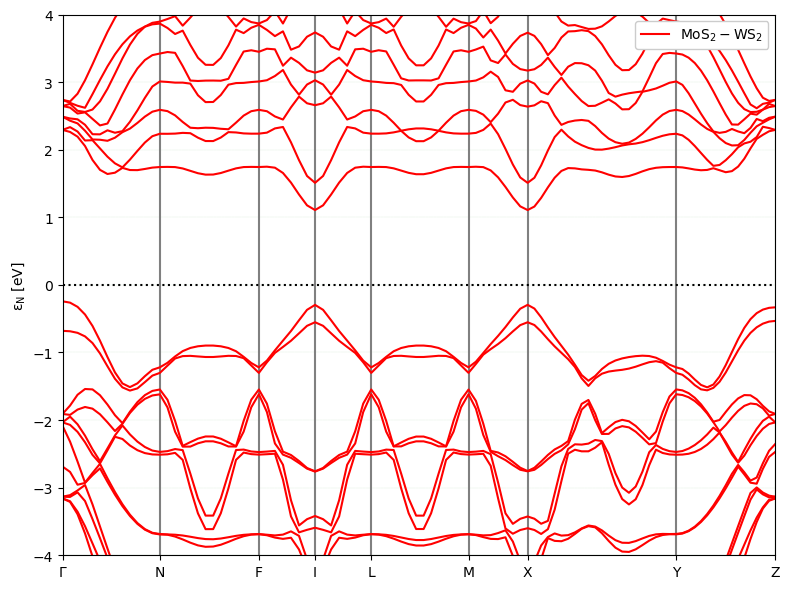

In [10]:
bs_calc = calc.fixed_density(kpts={'path': 'GNFILMXYZ', 'npoints': 100}, symmetry='off')
 # path through k-space taken from Materials project; or from analysis above

bs_calc.get_potential_energy() # eval at these k-point path
bs = bs_calc.band_structure().subtract_reference()
#bs=bs_calc.band_structure() # generate the plot object
#bs.ylabel(r'$\varepsilon_N(k)$ [eV]', size=24)
bs.plot(ylabel=r'$\mathrm{\varepsilon_N}$ [eV]', label=r'$\mathrm{MoS_{2}-WS_{2}}$', loc="upper right", color='r', emax=4, emin=-4)
plt.grid(which='major', axis='both', zorder=-1.0, color = 'green', linestyle = '--', linewidth = 0.05)
plt.tight_layout()
#plt.savefig('MoS2-MoS2.eps')
plt.show()

In [11]:
# Get the accurate HOMO and LUMO from the band structure calculator
homo, lumo = bs_calc.get_homo_lumo()

# Calculate the discontinuity potential using the ground state calculator and
# the accurate HOMO and LUMO
response = calc.hamiltonian.xc.response
dxc_pot = response.calculate_discontinuity_potential(homo, lumo)

# Calculate the discontinuity using the band structure calculator
bs_response = bs_calc.hamiltonian.xc.response
KS_gap, dxc = bs_response.calculate_discontinuity(dxc_pot)

In [12]:
# Derivative discontinuity
dxc

0.4791714782870457

In [13]:
KS_gap

1.350377994539654

In [14]:
# Fundamental band gap = Kohn-Sham band gap + derivative discontinuity
QP_gap = KS_gap + dxc
QP_gap

1.8295494728266997